# OLIMPIJSKE IGRE

Analiza dosežkov na olimpijskih igrah po državah in pogostosti posameznih športnih disciplin na olimpijskih igrah.

## Uvoz podatkov

In [175]:
import pandas as pd            # za delo s tabelami
import seaborn as sns          # za lepo risanje grafov             # da se grafi prikažejo v notebooku
%matplotlib inline

## ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option("display.max_rows", 10)
# pd.options.display.max_rows = 10      # druga opcija, oboje je ok

# naložimo razpredelnico, s katero bomo delali
MEDALJE = pd.read_csv("oi8.3_medalje_pregled.csv", index_col=0)
DISCIPLINE = pd.read_csv("oi9.3_discipline_pregled.csv", index_col=0)

In [176]:
MEDALJE_SUMMER = MEDALJE.filter(like="Summer").astype(int).rename(columns=lambda x: x.replace("-Summer", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_WINTER = MEDALJE.filter(like="Winter").astype(int).rename(columns=lambda x: x.replace("-Winter", "")).loc[lambda df: ~(df == 0).all(axis=1)]

In [177]:
MEDALJE_SKUPAJ = MEDALJE.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_SKUPAJ_SUMMER = MEDALJE_SUMMER.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_SKUPAJ_WINTER = MEDALJE_WINTER.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.replace("-Skupaj", "")).loc[lambda df: ~(df == 0).all(axis=1)]

# samo letnice, ne mesta
MEDALJE_SKUPAJ2_SUMMER = MEDALJE_SUMMER.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.split('-')[0]).loc[lambda df: ~(df == 0).all(axis=1)]
MEDALJE_SKUPAJ2_WINTER = MEDALJE_WINTER.filter(like="Skupaj").astype(int).rename(columns=lambda x: x.split('-')[0]).loc[lambda df: ~(df == 0).all(axis=1)]

In [178]:
DISCIPLINE_SUMMER = DISCIPLINE.filter(like="Summer").astype(int).rename(columns=lambda x: x.replace("-Summer", "")).loc[lambda df: ~(df == 0).all(axis=1)]
DISCIPLINE_WINTER = DISCIPLINE.filter(like="Winter").astype(int).rename(columns=lambda x: x.replace("-Winter", "")).loc[lambda df: ~(df == 0).all(axis=1)]

##

## Splošno

Število olimpijskih iger

In [179]:
print(f"Skupaj olimpijskih iger: {len(DISCIPLINE.columns)}")
print(f"Poletne olimpijske igre: {len(DISCIPLINE_SUMMER.columns)}")
print(f"Zimske olimpijske igre: {len(DISCIPLINE_WINTER.columns)}")

Skupaj olimpijskih iger: 54
Poletne olimpijske igre: 30
Zimske olimpijske igre: 24


Lokacija olimpijskih iger

In [180]:
kraji = DISCIPLINE.columns.str.split("-", n=2).str[1].value_counts()
kraji_najvec_oi = kraji[kraji == kraji.max()]

print(f"Največrat so se Olimpijske igre odvijale v {", ".join(kraji_najvec_oi.index)} in sicer {kraji.max()}-krat.")     #sklanjanje!!

Največrat so se Olimpijske igre odvijale v Paris, London in sicer 3-krat.


In [181]:
tokyo_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains("-Tokyo-")].str.split("-", n=2).str[0]
print(f"V Tokyu so bile Olimpijske igre {kraji['Tokyo']}-krat, in sicer leta {', '.join(tokyo_leta)}.")

V Tokyu so bile Olimpijske igre 2-krat, in sicer leta 1964, 2020.


In [182]:
mesto = "Tokyo"     # mesto za katero me zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Tokyo je gostilo Olimpijske igre 2-krat, in sicer leta 1964, 2020.


In [183]:
mesto = "Ljubljana"     # mesto za katero me zanima

if mesto.replace(" ", "_") not in kraji:
    print(f'Mesto {mesto} ni nikoli gostilo Olimpijskih iger.')
else:
    katera_leta = DISCIPLINE.columns[DISCIPLINE.columns.str.contains(f"-{mesto}-")].str.split("-", n=2).str[0]
    print(f"Mesto {mesto} je gostilo Olimpijske igre {kraji[mesto]}-krat, in sicer leta {', '.join(katera_leta)}.")

Mesto Ljubljana ni nikoli gostilo Olimpijskih iger.


## Medalje

Koliko medalj je bilo podeljenih vsako leto

In [184]:
MEDALJE_SKUPAJ.loc['Skupaj'] = MEDALJE_SKUPAJ.sum()
MEDALJE_SKUPAJ_SUMMER.loc['Skupaj'] = MEDALJE_SKUPAJ_SUMMER.sum()
MEDALJE_SKUPAJ_WINTER.loc['Skupaj'] = MEDALJE_SKUPAJ_WINTER.sum()

<Axes: >

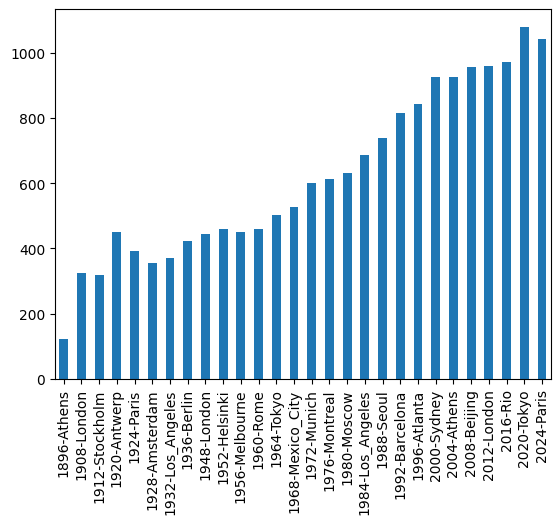

In [185]:
MEDALJE_SKUPAJ_SUMMER.loc['Skupaj'].plot.bar()
# MEDALJE_SKUPAJ_SUMMER.loc['Skupaj'].plot.bar(title="Skupaj osvojenih medalj po igrah na poletnih olimpijskih igrah", ylabel="Število osvojenih medalj", xlabel="Leta")

In [186]:
# MEDALJE_SKUPAJ2_SUMMER.loc['Skupaj'] = MEDALJE_SKUPAJ2_SUMMER.sum()     to ne dela!!
# MEDALJE_SKUPAJ2_WINTER.loc['Skupaj'] = MEDALJE_SKUPAJ2_WINTER.sum()

MEDALJE_SKUPAJ2_SUMMER.loc['Skupaj'] = MEDALJE_SKUPAJ2_SUMMER.sum().rename(lambda x: x.split('-')[0])
MEDALJE_SKUPAJ2_WINTER.loc['Skupaj'] = MEDALJE_SKUPAJ2_WINTER.sum().rename(lambda x: x.split('-')[0])

<Axes: title={'center': 'Skupaj osvojenih medalj po igrah na poletnih olimpijskih igrah'}, xlabel='Leta', ylabel='Število osvojenih medalj'>

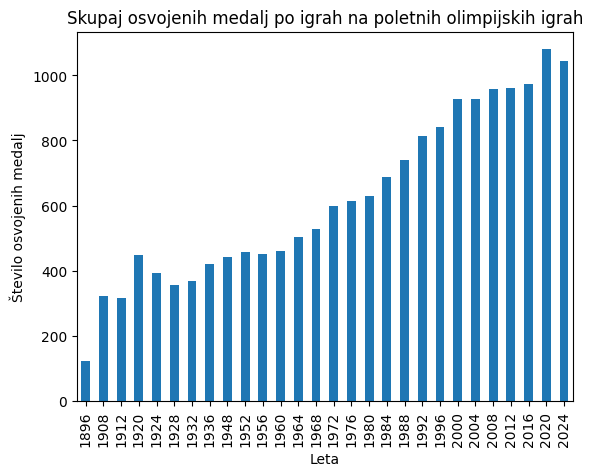

In [187]:
# MEDALJE_SKUPAJ2_SUMMER.loc['Skupaj'].plot.bar()
MEDALJE_SKUPAJ2_SUMMER.loc['Skupaj'].plot.bar(title="Skupaj osvojenih medalj po igrah na poletnih olimpijskih igrah", ylabel="Število osvojenih medalj", xlabel="Leta")

Katera drzava jih je tekom vseh let dobila najvec in koliko, katero leto najvec